<p style="background-color:#FFF;font-family:newtimeroman;color:#347C17;font-size:160%;text-align:center;border-style: solid;border-radius:8px 8px;border-color:#347C17;border-width: 5px;"> AVOCADO PRICE PREDICTION 🥑</p>

<center><img src = "https://wallpaperaccess.com/thumb/1348928.jpg"></center>
<p></p>

<p style="background-color:#FFF;font-family:newtimeroman;color:#347C17;font-size:180%;text-align:center;border-style: solid;border-radius:8px 8px;border-color:#347C17;border-width: 5px;"> ABOUT DATASET </p>

**Data Labels**
* <b> Date : </b> The date of the observation
* <b> AveragePrice : </b> The average price of a single avocado
* <b> type : </b> Conventional or organic
* <b> year : </b> The year
* <b> Region : </b> The city or region of the observation
* <b> Total Volume : </b> Total number of avocados sold
* <b> 4046 : </b> Total number of avocados with PLU 4046 sold
* <b> 4225 : </b> Total number of avocados with PLU 4225 sold
* <b> 4770 : </b> Total number of avocados with PLU 4770 sold

The Product Lookup codes (PLU’s) in the table are only for Hass avocados. Other varieties of avocados (e.g. greenskins) are not included in this table.

<p style="background-color:#FFF;font-family:newtimeroman;color:#347C17;font-size:180%;text-align:center;border-style: solid;border-radius:8px 8px;border-color:#347C17;border-width: 5px;"> IMPORTING LIBRARIES AND LOADING DATA </p>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [2]:
data = pd.read_csv('avocado.csv')
data.head(10)

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
5,5,2015-11-22,1.26,55979.78,1184.27,48067.99,43.61,6683.91,6556.47,127.44,0.0,conventional,2015,Albany
6,6,2015-11-15,0.99,83453.76,1368.92,73672.72,93.26,8318.86,8196.81,122.05,0.0,conventional,2015,Albany
7,7,2015-11-08,0.98,109428.33,703.75,101815.36,80.00,6829.22,6266.85,562.37,0.0,conventional,2015,Albany
8,8,2015-11-01,1.02,99811.42,1022.15,87315.57,85.34,11388.36,11104.53,283.83,0.0,conventional,2015,Albany
9,9,2015-10-25,1.07,74338.76,842.40,64757.44,113.00,8625.92,8061.47,564.45,0.0,conventional,2015,Albany


<p style="background-color:#FFF;font-family:newtimeroman;color:#347C17;font-size:180%;text-align:center;border-style: solid;border-radius:8px 8px;border-color:#347C17;border-width: 5px;"> EXPLORATORY DATA ANALYSIS 🔍  </p>

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


In [4]:
nan = data.isnull().sum()
nan

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

In [5]:
ds_sample = data.sample(10)
ds_sample

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
9476,38,2015-04-05,1.52,120814.24,57082.30,51295.72,0.00,12436.22,12436.22,0.00,0.00,organic,2015,California
14117,0,2016-12-25,2.56,16169.17,5599.25,8335.16,0.00,2234.76,2234.76,0.00,0.00,organic,2016,SanFrancisco
13032,7,2016-11-06,1.94,6815.62,1815.17,3164.88,0.00,1835.57,1827.56,8.01,0.00,organic,2016,LasVegas
7366,1,2017-12-24,0.75,1006477.79,488446.20,176311.28,14450.19,327270.12,230660.26,93116.53,3493.33,conventional,2017,PhoenixTucson
14297,24,2016-07-10,1.18,106469.22,40521.68,7584.26,0.00,58363.28,54171.61,4191.67,0.00,organic,2016,SouthCentral
12465,12,2016-10-02,1.77,8280.66,570.03,4396.02,0.00,3314.61,3048.20,266.41,0.00,organic,2016,Columbus
336,24,2015-07-12,1.13,5451636.92,2747299.98,1923893.11,157478.05,622965.78,601358.64,18032.41,3574.73,conventional,2015,California
668,44,2015-02-22,1.00,899302.80,153410.25,584093.63,5686.33,156112.59,62564.22,93534.16,14.21,conventional,2015,Denver
16955,41,2017-03-19,1.59,22169.84,927.81,13605.83,4.94,7631.26,1083.05,6548.21,0.00,organic,2017,SanDiego
3518,34,2016-05-01,1.00,319391.58,109542.32,48135.67,46048.82,115664.77,97920.55,6527.68,11216.54,conventional,2016,Detroit


In [6]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,18249.0,24.232232,1.548104e+01,0.00,10.00,24.00,38.00,52.00
AveragePrice,18249.0,1.405978,4.026766e-01,0.44,1.10,1.37,1.66,3.25
Total Volume,18249.0,850644.013009,3.453545e+06,84.56,10838.58,107376.76,432962.29,62505646.52
4046,18249.0,293008.424531,1.264989e+06,0.00,854.07,8645.30,111020.20,22743616.17
4225,18249.0,295154.568356,1.204120e+06,0.00,3008.78,29061.02,150206.86,20470572.61
4770,18249.0,22839.735993,1.074641e+05,0.00,0.00,184.99,6243.42,2546439.11
Total Bags,18249.0,239639.202060,9.862424e+05,0.00,5088.64,39743.83,110783.37,19373134.37
Small Bags,18249.0,182194.686696,7.461785e+05,0.00,2849.42,26362.82,83337.67,13384586.80
Large Bags,18249.0,54338.088145,2.439660e+05,0.00,127.47,2647.71,22029.25,5719096.61
XLarge Bags,18249.0,3106.426507,1.769289e+04,0.00,0.00,0.00,132.50,551693.65


In [7]:
price = data["AveragePrice"]
price.describe()

count    18249.000000
mean         1.405978
std          0.402677
min          0.440000
25%          1.100000
50%          1.370000
75%          1.660000
max          3.250000
Name: AveragePrice, dtype: float64

C:\Users\goksel\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


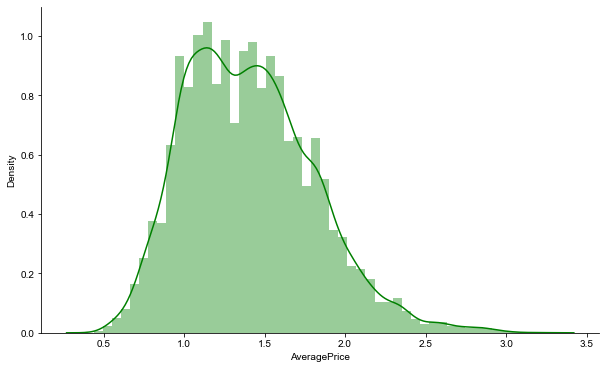

In [8]:
fig = plt.figure(figsize=(10,6));
sns.distplot(data["AveragePrice"],color="green");
sns.set_style("white");
sns.despine();

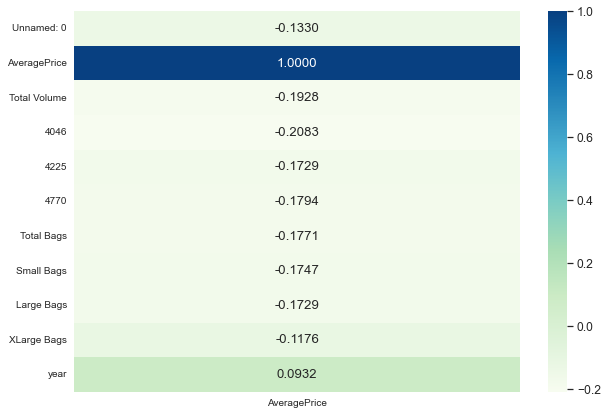

In [9]:
corr_AveragePrice = data.corrwith(price, axis=0)
corr_AveragePrice = pd.DataFrame(corr_AveragePrice)
corr_AveragePrice.rename (columns = {0: 'AveragePrice'}, inplace = True)

plt.subplots(figsize=(10,7))
sns.set(font_scale=1.1)
sns.heatmap(corr_AveragePrice, vmax=1, cmap="GnBu",fmt='.4f',annot=True);

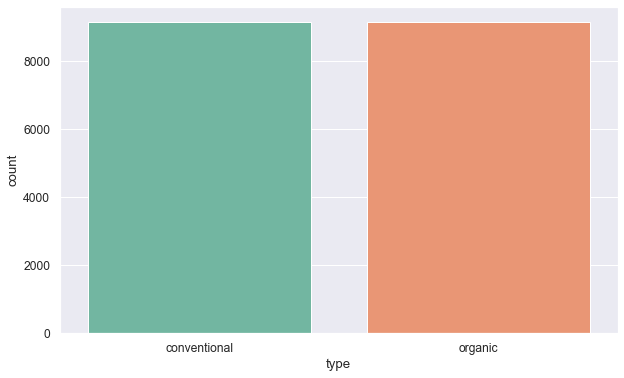

In [10]:
fig = plt.figure(figsize=(10,6))
sns.countplot(x="type", data=data, palette='Set2');

<p style="background-color:#FFF;font-family:newtimeroman;color:#347C17;font-size:180%;text-align:center;border-style: solid;border-radius:8px 8px;border-color:#347C17;border-width: 5px;"> PREPROCESSING 🔨  </p>

In [11]:
data = data.drop(columns = ["Unnamed: 0"])

In [12]:
#%% total bags =? small + large + xlarge

bags = data[["Total Bags", "Small Bags", "Large Bags", "XLarge Bags"]]
bags["total"] = bags["Small Bags"] + bags["Large Bags"] + bags["XLarge Bags"]
bags["diff"] = bags["Total Bags"] - bags["total"]
bags

C:\Users\goksel\AppData\Local\Temp/ipykernel_9452/1157066091.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bags["total"] = bags["Small Bags"] + bags["Large Bags"] + bags["XLarge Bags"]
C:\Users\goksel\AppData\Local\Temp/ipykernel_9452/1157066091.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bags["diff"] = bags["Total Bags"] - bags["total"]


,Total Bags,Small Bags,Large Bags,XLarge Bags,total,diff
0,8696.87,8603.62,93.25,0.0,8696.87,0.000000e+00
1,9505.56,9408.07,97.49,0.0,9505.56,0.000000e+00
2,8145.35,8042.21,103.14,0.0,8145.35,0.000000e+00
3,5811.16,5677.40,133.76,0.0,5811.16,0.000000e+00
4,6183.95,5986.26,197.69,0.0,6183.95,0.000000e+00
...,...,...,...,...,...,...
18244,13498.67,13066.82,431.85,0.0,13498.67,0.000000e+00
18245,9264.84,8940.04,324.80,0.0,9264.84,0.000000e+00
18246,9394.11,9351.80,42.31,0.0,9394.11,1.818989e-12
18247,10969.54,10919.54,50.00,0.0,10969.54,0.000000e+00


In [13]:
data = data.drop(columns = ["Total Bags"])

In [14]:
data.groupby('region')["type"].count()

region
Albany                 338
Atlanta                338
BaltimoreWashington    338
Boise                  338
Boston                 338
BuffaloRochester       338
California             338
Charlotte              338
Chicago                338
CincinnatiDayton       338
Columbus               338
DallasFtWorth          338
Denver                 338
Detroit                338
GrandRapids            338
GreatLakes             338
HarrisburgScranton     338
HartfordSpringfield    338
Houston                338
Indianapolis           338
Jacksonville           338
LasVegas               338
LosAngeles             338
Louisville             338
MiamiFtLauderdale      338
Midsouth               338
Nashville              338
NewOrleansMobile       338
NewYork                338
Northeast              338
NorthernNewEngland     338
Orlando                338
Philadelphia           338
PhoenixTucson          338
Pittsburgh             338
Plains                 338
Portland             

In [15]:
regions = data["region"].unique()
regions

array(['Albany', 'Atlanta', 'BaltimoreWashington', 'Boise', 'Boston',
       'BuffaloRochester', 'California', 'Charlotte', 'Chicago',
       'CincinnatiDayton', 'Columbus', 'DallasFtWorth', 'Denver',
       'Detroit', 'GrandRapids', 'GreatLakes', 'HarrisburgScranton',
       'HartfordSpringfield', 'Houston', 'Indianapolis', 'Jacksonville',
       'LasVegas', 'LosAngeles', 'Louisville', 'MiamiFtLauderdale',
       'Midsouth', 'Nashville', 'NewOrleansMobile', 'NewYork',
       'Northeast', 'NorthernNewEngland', 'Orlando', 'Philadelphia',
       'PhoenixTucson', 'Pittsburgh', 'Plains', 'Portland',
       'RaleighGreensboro', 'RichmondNorfolk', 'Roanoke', 'Sacramento',
       'SanDiego', 'SanFrancisco', 'Seattle', 'SouthCarolina',
       'SouthCentral', 'Southeast', 'Spokane', 'StLouis', 'Syracuse',
       'Tampa', 'TotalUS', 'West', 'WestTexNewMexico'], dtype=object)

In [16]:
data["Date"] = pd.to_datetime(data["Date"])
data["Month"] = data['Date'].dt.month
data["Day"] = data['Date'].dt.day
data = data.drop(columns=["Date"])
data.head()

,AveragePrice,Total Volume,4046,4225,4770,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
0,1.33,64236.62,1036.74,54454.85,48.16,8603.62,93.25,0.0,conventional,2015,Albany,12,27
1,1.35,54876.98,674.28,44638.81,58.33,9408.07,97.49,0.0,conventional,2015,Albany,12,20
2,0.93,118220.22,794.70,109149.67,130.50,8042.21,103.14,0.0,conventional,2015,Albany,12,13
3,1.08,78992.15,1132.00,71976.41,72.58,5677.40,133.76,0.0,conventional,2015,Albany,12,6
4,1.28,51039.60,941.48,43838.39,75.78,5986.26,197.69,0.0,conventional,2015,Albany,11,29


In [17]:
le = LabelEncoder()
data["type"] = le.fit_transform(data["type"])
data["region"] = le.fit_transform(data["region"])
data.head()


,AveragePrice,Total Volume,4046,4225,4770,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
0,1.33,64236.62,1036.74,54454.85,48.16,8603.62,93.25,0.0,0,2015,0,12,27
1,1.35,54876.98,674.28,44638.81,58.33,9408.07,97.49,0.0,0,2015,0,12,20
2,0.93,118220.22,794.70,109149.67,130.50,8042.21,103.14,0.0,0,2015,0,12,13
3,1.08,78992.15,1132.00,71976.41,72.58,5677.40,133.76,0.0,0,2015,0,12,6
4,1.28,51039.60,941.48,43838.39,75.78,5986.26,197.69,0.0,0,2015,0,11,29


<a id="5"></a>
<p style="background-color:#FFF;font-family:newtimeroman;color:#347C17;font-size:180%;text-align:center;border-style: solid;border-radius:8px 8px;border-color:#347C17;border-width: 5px;"> MODELING 🦾  </p>

In [18]:
X = data.drop(columns = ["AveragePrice"])
y = data["AveragePrice"]

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [19]:
model = RandomForestRegressor()
tuned = model.fit(X_train, y_train)

y_pred = model.predict(X_test )


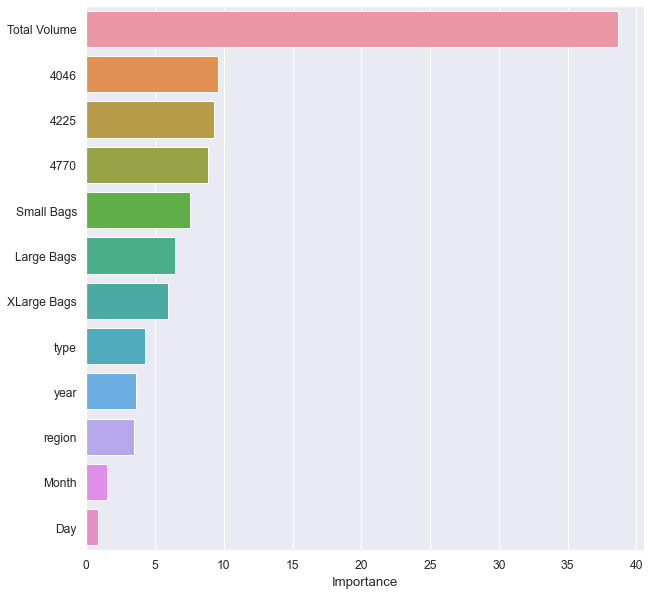

In [20]:
rf_Importance = pd.DataFrame({"Importance": tuned.feature_importances_*100},index = X_train.columns)

s = rf_Importance.sort_values(by = "Importance", axis=0, ascending = False)
fig_dims = (10, 10)
fig, ax = plt.subplots(figsize=fig_dims)
sns.barplot(x = "Importance", y =  rf_Importance["Importance"].index, ax=ax, data=s);

In [21]:
score_r2 = metrics.r2_score(y_test, y_pred)
score_r2

0.8836503917623284

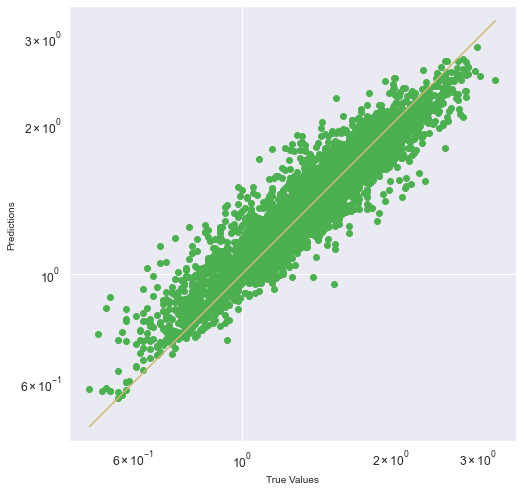

In [22]:
plt.figure(figsize=(8,8))
plt.scatter(y_test, y_pred, c="#4CAF50")
plt.yscale('log')
plt.xscale('log')

p1 = max(max(y_pred), max(y_test))
p2 = min(min(y_pred), min(y_test))
plt.plot([p1, p2], [p1, p2], "y-")
plt.xlabel('True Values', fontsize=10)
plt.ylabel('Predictions', fontsize=10)
plt.axis('equal')
plt.show()

In [23]:
scaler = StandardScaler()

scaler.fit(X_train)
X_train= scaler.transform(X_train)

scaler.fit(X_test)
X_test = scaler.transform(X_test)

In [24]:
model = RandomForestRegressor()
tuned = model.fit(X_train, y_train)

y_pred = model.predict(X_test )

In [25]:
score_r2 = metrics.r2_score(y_test, y_pred)
score_r2

0.49030006212500665

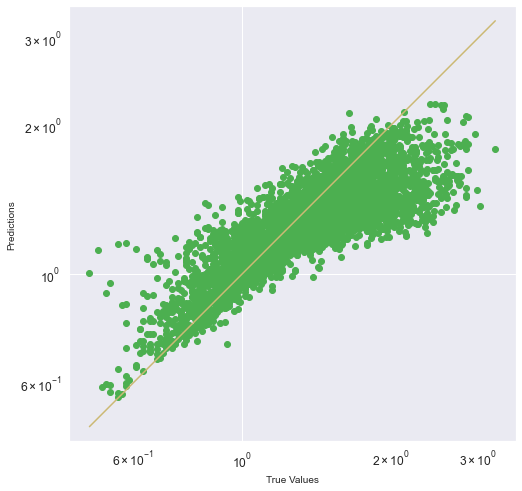

In [26]:
plt.figure(figsize=(8,8))
plt.scatter(y_test, y_pred, c='#4CAF50')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(y_pred), max(y_test))
p2 = min(min(y_pred), min(y_test))
plt.plot([p1, p2], [p1, p2], 'y-')
plt.xlabel('True Values', fontsize=10)
plt.ylabel('Predictions', fontsize=10)
plt.axis('equal')
plt.show()